<h1> Importing librarys </h1> 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Reading Data Set </h1>

In [3]:
data = pd.read_csv('2019_nCoV_data.csv')
data.head()

Sno                 Date Province/State Country          Last Update  \
0    1  01/22/2020 12:00:00          Anhui   China  01/22/2020 12:00:00   
1    2  01/22/2020 12:00:00        Beijing   China  01/22/2020 12:00:00   
2    3  01/22/2020 12:00:00      Chongqing   China  01/22/2020 12:00:00   
3    4  01/22/2020 12:00:00         Fujian   China  01/22/2020 12:00:00   
4    5  01/22/2020 12:00:00          Gansu   China  01/22/2020 12:00:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

<h1> Checking Dataset </h1>

In [168]:
data.dtypes

Sno                        int64
Date              datetime64[ns]
Province/State            object
Country                   object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [4]:
data.describe()

Sno     Confirmed       Deaths    Recovered
count  1719.000000   1719.000000  1719.000000  1719.000000
mean    860.000000    454.596859    10.441536    44.361838
std     496.376873   3712.529032   106.638286   351.078713
min       1.000000      0.000000     0.000000     0.000000
25%     430.500000      2.000000     0.000000     0.000000
50%     860.000000     12.000000     0.000000     0.000000
75%    1289.500000    109.000000     0.000000     7.000000
max    1719.000000  59989.000000  1789.000000  7862.000000

In [5]:
data.describe(include="O")

Date Province/State         Country  \
count                  1719           1257            1719   
unique                   27             61              34   
top     02/17/2020 22:00:00       Shandong  Mainland China   
freq                     75             27             801   

                Last Update  
count                  1719  
unique                  520  
top     01/31/2020 19:00:00  
freq                     63

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 107.5+ KB


In [7]:
data.isna().sum()

Sno                 0
Date                0
Province/State    462
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [15]:
data["Country"].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium',
       'Others', 'Egypt'], dtype=object)

<h1> Exploratory data analysis </h1>

Excluding country name Others

In [19]:
data=data[data.Country!='Others']
data.head()

Sno                Date Province/State Country         Last Update  \
0    1 2020-01-22 12:00:00          Anhui   China 2020-01-22 12:00:00   
1    2 2020-01-22 12:00:00        Beijing   China 2020-01-22 12:00:00   
2    3 2020-01-22 12:00:00      Chongqing   China 2020-01-22 12:00:00   
3    4 2020-01-22 12:00:00         Fujian   China 2020-01-22 12:00:00   
4    5 2020-01-22 12:00:00          Gansu   China 2020-01-22 12:00:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

[](http://)Extracting Date and Time from the 'Last Update' column

In [20]:
data["Date"] = pd.to_datetime(data["Date"])

In [21]:
data['Last Update'] = pd.to_datetime(data['Last Update'])
data['Last Update'].head()

0   2020-01-22 12:00:00
1   2020-01-22 12:00:00
2   2020-01-22 12:00:00
3   2020-01-22 12:00:00
4   2020-01-22 12:00:00
Name: Last Update, dtype: datetime64[ns]

Checking Date-wise Trend of confirmed patients and number of death

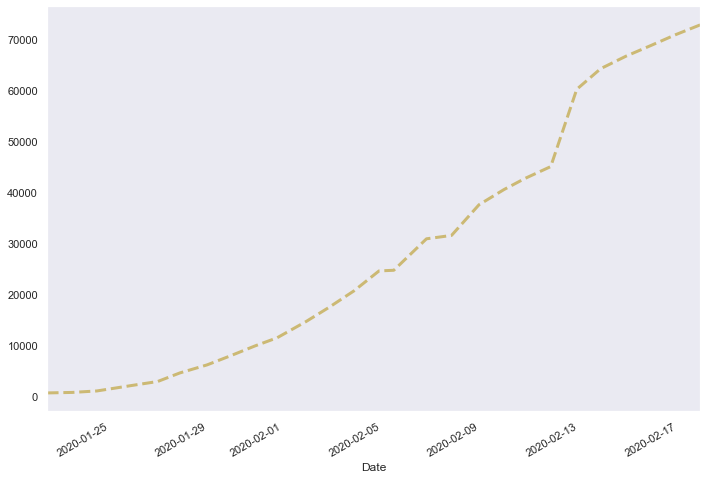

In [129]:
data.groupby('Date').sum()['Confirmed'].plot(color= 'y',linestyle='--', linewidth=3)
plt.grid()

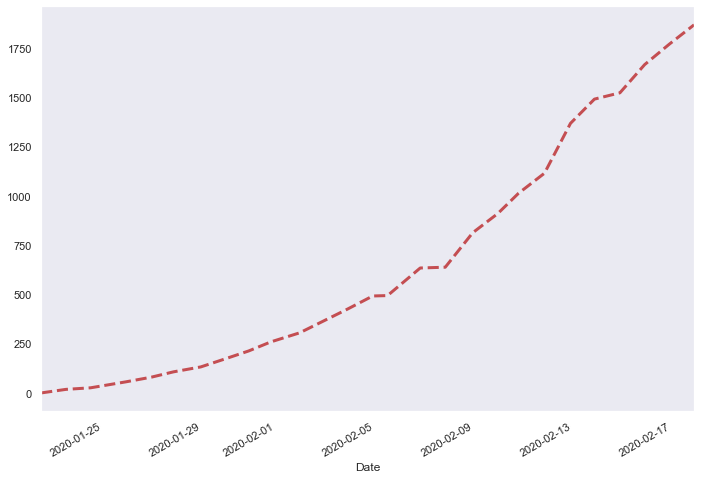

In [128]:
data.groupby('Date').sum()['Deaths'].plot(color= 'r',linestyle='--', linewidth=3)
plt.grid()

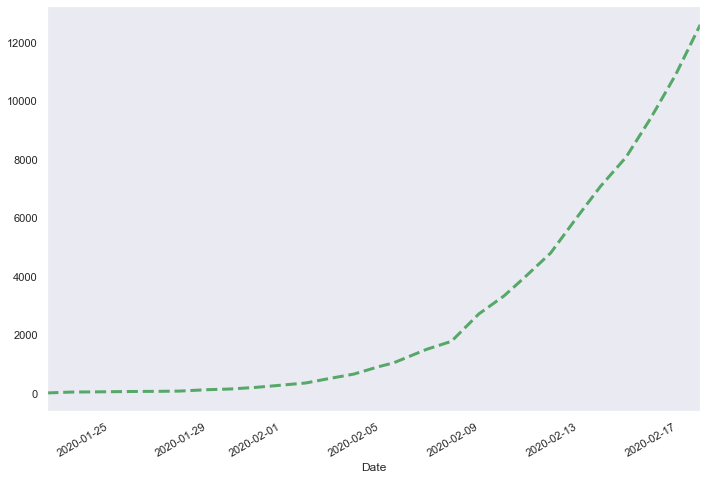

In [124]:
data.groupby('Date').sum()['Recovered'].plot(color= 'g',linestyle='--', linewidth=3)
plt.grid()

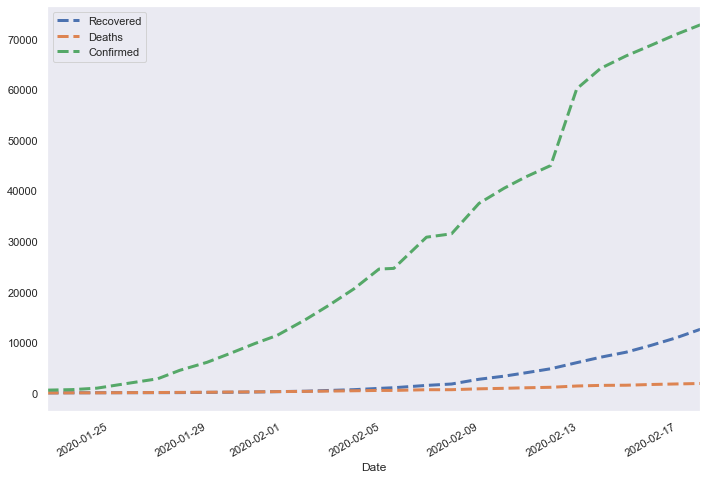

In [125]:
data.groupby('Date').sum()[['Recovered','Deaths','Confirmed']].plot(linestyle='--', linewidth=3)
plt.grid()

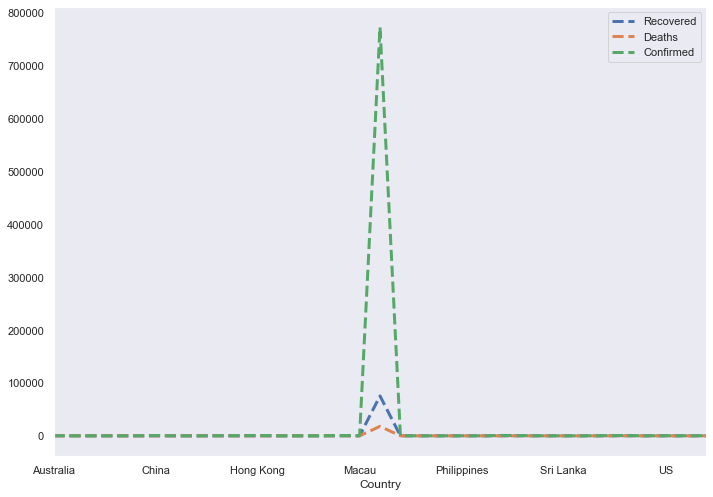

In [139]:
data.groupby('Country').sum()[['Recovered','Deaths','Confirmed']].plot(linestyle='--', linewidth=3)
plt.grid()

Country-wise Distribution

In [113]:
country_count = data['Country'].value_counts().reset_index()
country_count.head()

index  Country
0  Mainland China      801
1              US      188
2       Australia       84
3          Canada       59
4           China       34

In [114]:
country_count = country_count.rename(columns={"index": "Country", "Country": "Count"})
country_count.head()


Country  Count
0  Mainland China    801
1              US    188
2       Australia     84
3          Canada     59
4           China     34

In [117]:

##country_count.set_index(['Country'],inplace=True)
##country_count.set_index(['Count'],inplace=True)


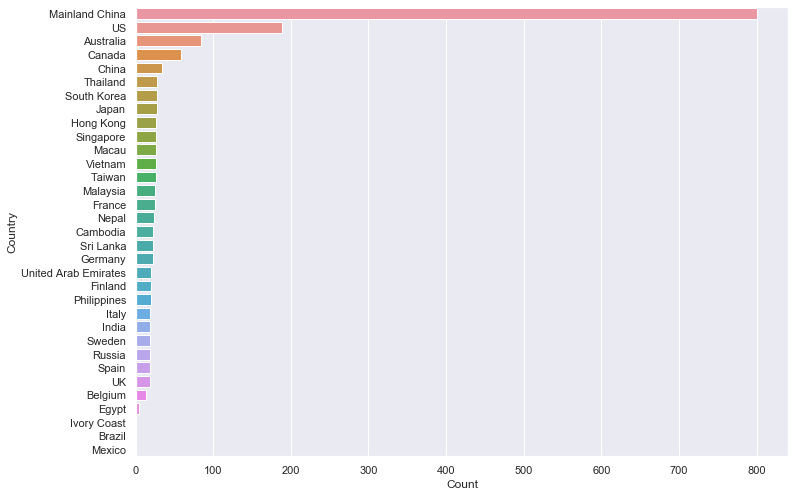

In [116]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Count',y='Country',data=country_count)


In [97]:
country_count = pd.DataFrame(data.groupby('Country')['Confirmed'].max()).reset_index()
country_count.head()

Country  Confirmed
0  Australia        5.0
1    Belgium        1.0
2     Brazil        0.0
3   Cambodia        1.0
4     Canada        5.0

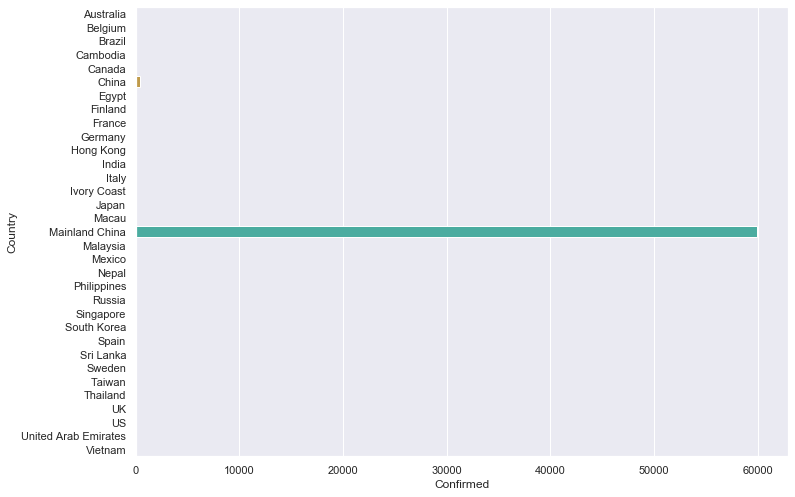

In [98]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Confirmed',y='Country',data=country_count)


In [99]:
country_count_wo_mc=country_count[country_count.Country != 'Mainland China']
country_count_wo_mc.head()

Country  Confirmed
0  Australia        5.0
1    Belgium        1.0
2     Brazil        0.0
3   Cambodia        1.0
4     Canada        5.0

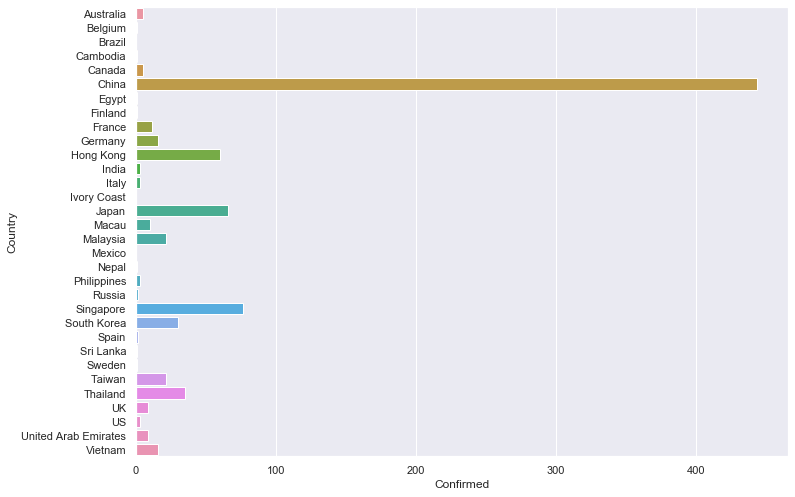

In [87]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Confirmed',y='Country',data=country_count_wo_mc)


In [119]:
conda install -c plotly plotly

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         2.8 MB
    plotly-4.5.2               |             py_0         3.9 MB  plotly
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-4.5.2-py_0
  retrying           pkgs/main/win-64::retrying-1.3.3-py37_2

The following packages will be UPDATED:

  conda                                       4.7.10-py37_0 --> 4.8.2-py37_0




retrying-1.3.3       | 16 KB     |            |   0% 
retrying-1.3.3       | 16 KB     | #########9

In [130]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = country_count_wo_mc.Country,values = country_count_wo_mc.Confirmed)])
fig.update_layout(title="Country-wise distribution except Mainland China")
fig.show()

In [131]:
state_count = pd.DataFrame(data[data['Country']=='Mainland China'].groupby('Province/State').max()['Confirmed']).reset_index()
fig = go.Figure(data = [go.Pie(labels = state_count['Province/State'],values = state_count.Confirmed)])
fig.update_layout(title="State-wise distribution of Mainland China")
fig.show()

Growth trend of Corona virus in each Country individually except Mainland China

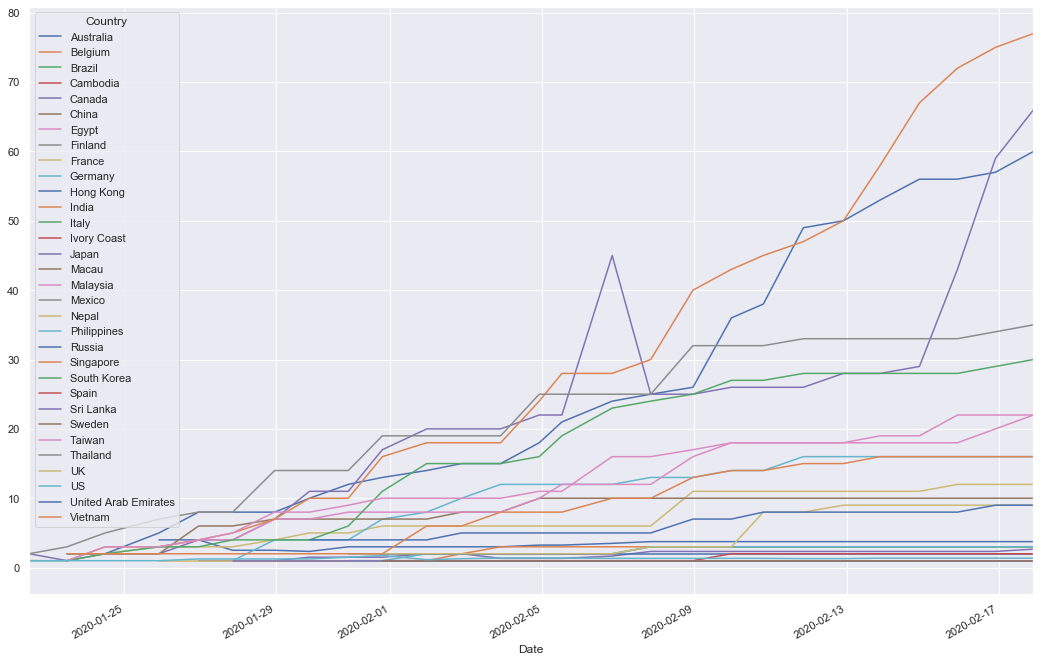

In [132]:
growth_country = pd.pivot_table(data[data.Country!='Mainland China'], values='Confirmed', columns='Country', index='Date')
growth_country.plot(figsize=(18,12))

Growth trend of Corona virus in each Province/State of Mainland China individually

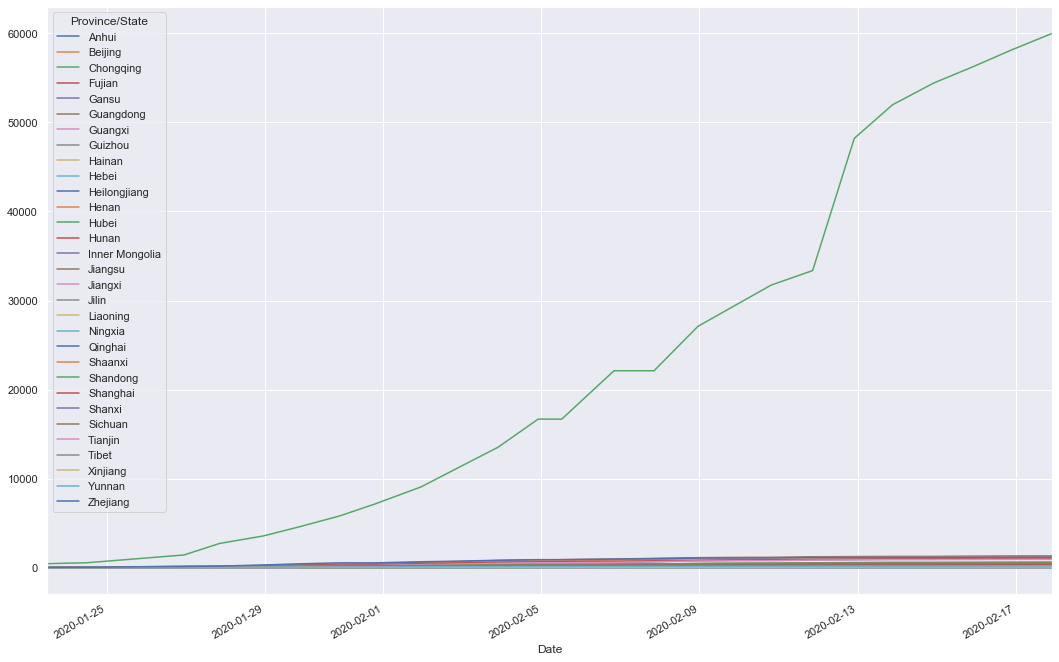

In [133]:
growth_state = pd.pivot_table(data[data['Country']=='Mainland China'], values='Confirmed', columns='Province/State', index='Date')
growth_state.plot(figsize=(18,12))

Country affected on the first day and number of confirmed cases on that date in each country.

In [142]:
initial_country=data[data['Date'] == data['Date'][0]]['Country'].unique()
initial_country

array(['China', 'US', 'Japan', 'Thailand', 'South Korea'], dtype=object)

In [143]:
data[data['Date'] == data['Date'][0]].groupby('Country').sum()['Confirmed']

Country
China          549.0
Japan            2.0
South Korea      1.0
Thailand         2.0
US               1.0
Name: Confirmed, dtype: float64

Total Confirmed, Recovery and Death in each country

In [150]:
global_case_wo_mc = data[data.Country != 'Mainland China'].groupby('Country')['Confirmed','Deaths','Recovered'].max().reset_index()
global_case_wo_mc

Country  Confirmed  Deaths  Recovered
0              Australia        5.0     0.0        4.0
1                Belgium        1.0     0.0        1.0
2                 Brazil        0.0     0.0        0.0
3               Cambodia        1.0     0.0        1.0
4                 Canada        5.0     0.0        1.0
5                  China      444.0     0.0        0.0
6                  Egypt        1.0     0.0        0.0
7                Finland        1.0     0.0        1.0
8                 France       12.0     1.0        4.0
9                Germany       16.0     0.0        1.0
10             Hong Kong       60.0     1.0        2.0
11                 India        3.0     0.0        3.0
12                 Italy        3.0     0.0        0.0
13           Ivory Coast        0.0     0.0        0.0
14                 Japan       66.0     1.0       12.0
15                 Macau       10.0     0.0        5.0
16              Malaysia       22.0     0.0        7.0
17                Mexico        0.0     0.0        0.0
18                 Nepal        1.0     0.0        1.0
19           Philippines        3.0     1.0        1.0
20                Russia        2.0     0.0        2.0
21             Singapore       77.0     0.0       24.0
22           South Korea       30.0     0.0       10.0
23                 Spain        2.0     0.0        2.0
24             Sri Lanka        1.0     0.0        1.0
25                Sweden        1.0     0.0        0.0
26                Taiwan       22.0     1.0        2.0
27              Thailand       35.0     0.0       15.0
28                    UK        9.0     0.0        8.0
29                    US        3.0     0.0        2.0
30  United Arab Emirates        9.0     0.0        4.0
31               Vietnam       16.0     0.0        7.0

In [151]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Confirmed']),
    go.Bar(name='Deaths', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Deaths']),
    go.Bar(name='Recovered', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Recovered']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [152]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Confirmed']),
    go.Bar(name='Deaths', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Deaths']),
    go.Bar(name='Recovered', x=global_case_wo_mc['Country'], y=global_case_wo_mc['Recovered']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Total Confirmed, Recovery and Death in each Province/State of Mainland China

In [153]:
mainland_case = data[data['Country']=='Mainland China'].groupby('Province/State')['Confirmed','Deaths','Recovered'].sum().reset_index()
mainland_case.head()

Province/State  Confirmed  Deaths  Recovered
0          Anhui    13621.0    46.0     1729.0
1        Beijing     5939.0    42.0      876.0
2      Chongqing     8702.0    50.0     1340.0
3         Fujian     4613.0     1.0      614.0
4          Gansu     1424.0    19.0      374.0

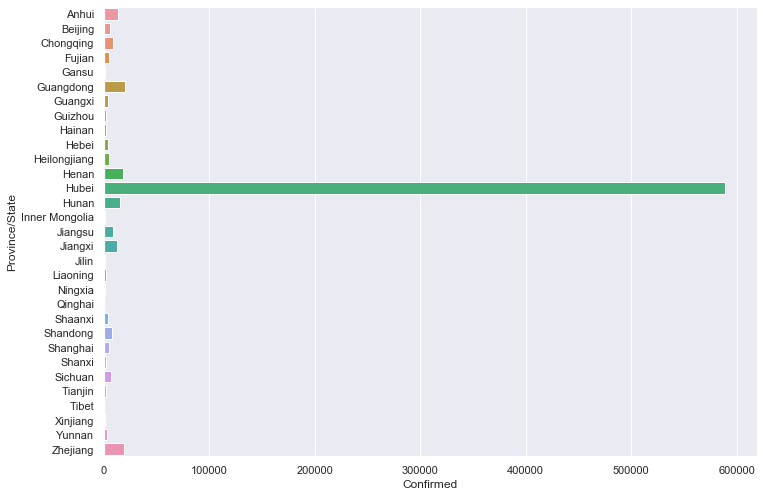

In [155]:
sns.barplot(x='Confirmed',y='Province/State',data=mainland_case)

In [154]:
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=mainland_case['Province/State'], y=mainland_case['Confirmed']),
    go.Bar(name='Deaths', x=mainland_case['Province/State'], y=mainland_case['Deaths']),
    go.Bar(name='Recovered', x=mainland_case['Province/State'], y=mainland_case['Recovered']),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

Death Trend Globally

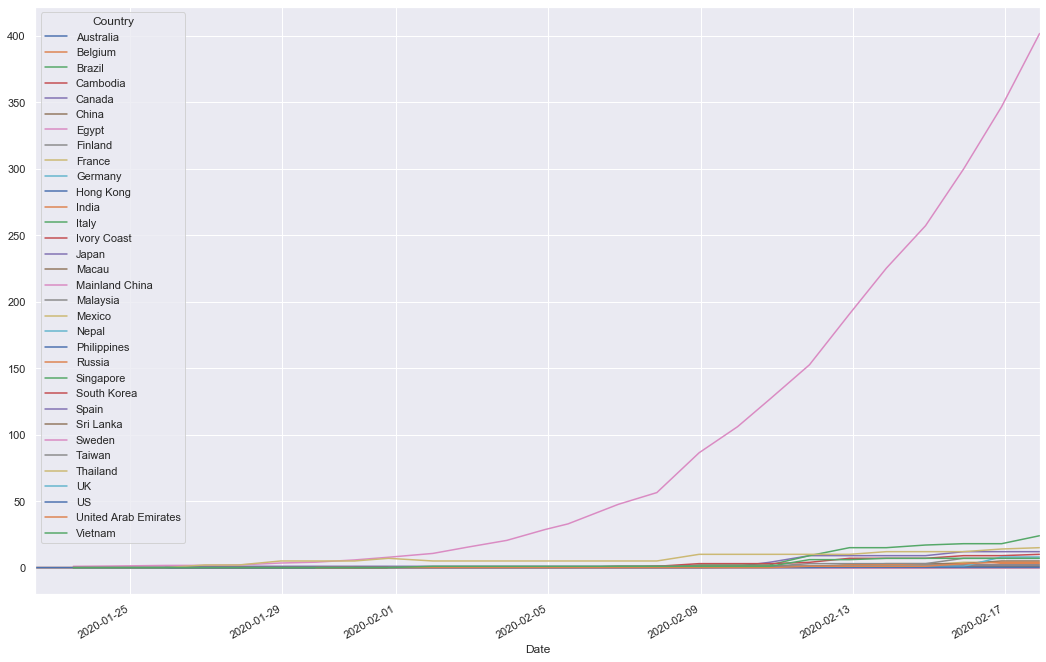

In [158]:
recovery_country = pd.pivot_table(data, values='Recovered', columns='Country', index='Date')
recovery_country.plot(figsize=(18,12))

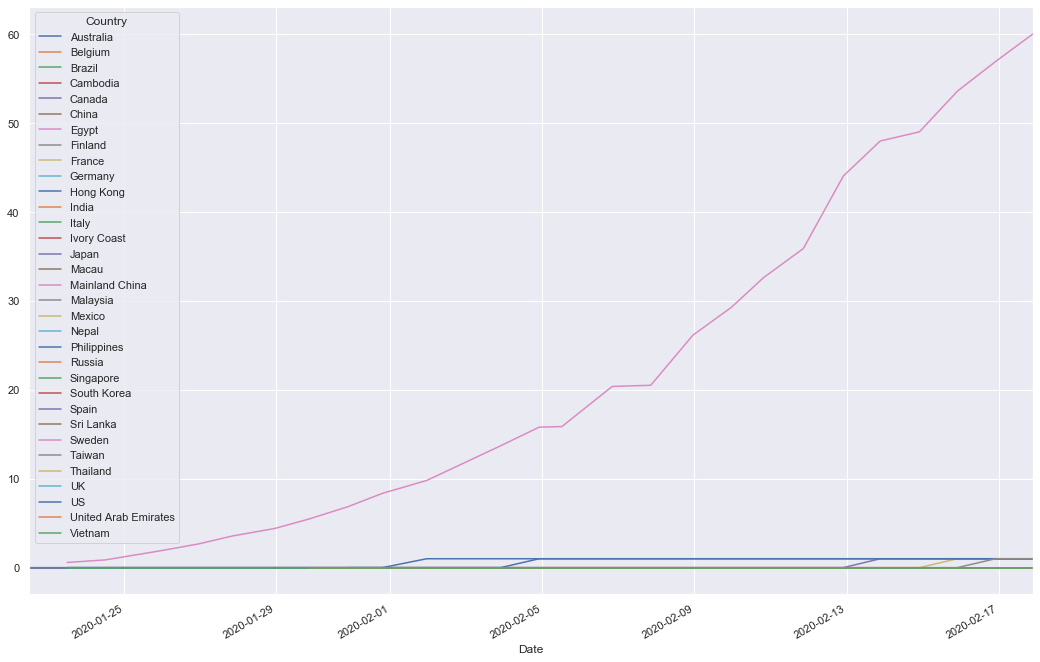

In [159]:
death_country = pd.pivot_table(data, values='Deaths', columns='Country', index='Date')
death_country.plot(figsize=(18,12))

<h3> Confirmed, Recovery and Death globally on world map </h3>

In [160]:
global_case = data.groupby('Country')['Confirmed','Deaths','Recovered'].max().reset_index()
global_case

Country  Confirmed  Deaths  Recovered
0              Australia        5.0     0.0        4.0
1                Belgium        1.0     0.0        1.0
2                 Brazil        0.0     0.0        0.0
3               Cambodia        1.0     0.0        1.0
4                 Canada        5.0     0.0        1.0
5                  China      444.0     0.0        0.0
6                  Egypt        1.0     0.0        0.0
7                Finland        1.0     0.0        1.0
8                 France       12.0     1.0        4.0
9                Germany       16.0     0.0        1.0
10             Hong Kong       60.0     1.0        2.0
11                 India        3.0     0.0        3.0
12                 Italy        3.0     0.0        0.0
13           Ivory Coast        0.0     0.0        0.0
14                 Japan       66.0     1.0       12.0
15                 Macau       10.0     0.0        5.0
16        Mainland China    59989.0  1789.0     7862.0
17              Malaysia       22.0     0.0        7.0
18                Mexico        0.0     0.0        0.0
19                 Nepal        1.0     0.0        1.0
20           Philippines        3.0     1.0        1.0
21                Russia        2.0     0.0        2.0
22             Singapore       77.0     0.0       24.0
23           South Korea       30.0     0.0       10.0
24                 Spain        2.0     0.0        2.0
25             Sri Lanka        1.0     0.0        1.0
26                Sweden        1.0     0.0        0.0
27                Taiwan       22.0     1.0        2.0
28              Thailand       35.0     0.0       15.0
29                    UK        9.0     0.0        8.0
30                    US        3.0     0.0        2.0
31  United Arab Emirates        9.0     0.0        4.0
32               Vietnam       16.0     0.0        7.0

# Importing the world_coordinates dataset

In [176]:
world_coordinates = pd.read_csv("world_coordinates.csv")

In [180]:
# Creating a dataframe with total no of confirmed cases for every country
Number_of_countries = len(data['Country'].value_counts())


cases = pd.DataFrame(data.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

Country  Confirmed
1              Australia      284.0
2                Belgium       14.0
3                 Brazil        0.0
4               Cambodia       22.0
5                 Canada      116.0
6                  China      549.0
7                  Egypt        4.0
8                Finland       20.0
9                 France      186.0
10               Germany      252.0
11             Hong Kong      681.0
12                 India       50.0
13                 Italy       49.0
14           Ivory Coast        0.0
15                 Japan      591.0
16                 Macau      209.0
17        Mainland China   772951.0
18              Malaysia      303.0
19                Mexico        0.0
20                 Nepal       24.0
21           Philippines       47.0
22                Russia       36.0
23             Singapore      797.0
24           South Korea      444.0
25                 Spain       27.0
26             Sri Lanka       22.0
27                Sweden       18.0
28                Taiwan      320.0
29              Thailand      581.0
30                    UK       93.0
31                    US      250.0
32  United Arab Emirates      126.0
33               Vietnam      225.0

In [181]:
# Merging the coordinates dataframe with original dataframe
world_data = pd.merge(world_coordinates,global_cases,on='Country')
world_data.head()

Code               Country   latitude   longitude  Confirmed
0   AE  United Arab Emirates  23.424076   53.847818      126.0
1   AU             Australia -25.274398  133.775136      284.0
2   BE               Belgium  50.503887    4.469936       14.0
3   BR                Brazil -14.235004  -51.925280        0.0
4   CA                Canada  56.130366 -106.346771      116.0

In [182]:
# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['latitude'], world_data['longitude'], world_data['Confirmed'], world_data['Country']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

In [203]:
#Mainland China
China1 = data[data['Country']=='China']
China2 = data[data['Country']=='Mainland China']
China1.append(China2)

Sno                Date  Province/State         Country  \
0        1 2020-01-22 12:00:00           Anhui           China   
1        2 2020-01-22 12:00:00         Beijing           China   
2        3 2020-01-22 12:00:00       Chongqing           China   
3        4 2020-01-22 12:00:00          Fujian           China   
4        5 2020-01-22 12:00:00           Gansu           China   
5        6 2020-01-22 12:00:00       Guangdong           China   
6        7 2020-01-22 12:00:00         Guangxi           China   
7        8 2020-01-22 12:00:00         Guizhou           China   
8        9 2020-01-22 12:00:00          Hainan           China   
9       10 2020-01-22 12:00:00           Hebei           China   
10      11 2020-01-22 12:00:00    Heilongjiang           China   
11      12 2020-01-22 12:00:00           Henan           China   
12      13 2020-01-22 12:00:00       Hong Kong           China   
13      14 2020-01-22 12:00:00           Hubei           China   
14      15 2020-01-22 12:00:00           Hunan           China   
15      16 2020-01-22 12:00:00  Inner Mongolia           China   
16      17 2020-01-22 12:00:00         Jiangsu           China   
17      18 2020-01-22 12:00:00         Jiangxi           China   
18      19 2020-01-22 12:00:00           Jilin           China   
19      20 2020-01-22 12:00:00        Liaoning           China   
20      21 2020-01-22 12:00:00           Macau           China   
21      22 2020-01-22 12:00:00         Ningxia           China   
22      23 2020-01-22 12:00:00         Qinghai           China   
23      24 2020-01-22 12:00:00         Shaanxi           China   
24      25 2020-01-22 12:00:00        Shandong           China   
25      26 2020-01-22 12:00:00        Shanghai           China   
26      27 2020-01-22 12:00:00          Shanxi           China   
27      28 2020-01-22 12:00:00         Sichuan           China   
28      29 2020-01-22 12:00:00          Taiwan           China   
29      30 2020-01-22 12:00:00         Tianjin           China   
...    ...                 ...             ...             ...   
1645  1646 2020-02-17 22:00:00       Guangdong  Mainland China   
1646  1647 2020-02-17 22:00:00           Henan  Mainland China   
1647  1648 2020-02-17 22:00:00        Zhejiang  Mainland China   
1648  1649 2020-02-17 22:00:00           Hunan  Mainland China   
1649  1650 2020-02-17 22:00:00           Anhui  Mainland China   
1650  1651 2020-02-17 22:00:00         Jiangxi  Mainland China   
1651  1652 2020-02-17 22:00:00         Jiangsu  Mainland China   
1652  1653 2020-02-17 22:00:00       Chongqing  Mainland China   
1653  1654 2020-02-17 22:00:00        Shandong  Mainland China   
1654  1655 2020-02-17 22:00:00         Sichuan  Mainland China   
1655  1656 2020-02-17 22:00:00    Heilongjiang  Mainland China   
1657  1658 2020-02-17 22:00:00         Beijing  Mainland China   
1658  1659 2020-02-17 22:00:00        Shanghai  Mainland China   
1659  1660 2020-02-17 22:00:00           Hebei  Mainland China   
1660  1661 2020-02-17 22:00:00          Fujian  Mainland China   
1661  1662 2020-02-17 22:00:00         Shaanxi  Mainland China   
1662  1663 2020-02-17 22:00:00         Guangxi  Mainland China   
1663  1664 2020-02-17 22:00:00          Yunnan  Mainland China   
1664  1665 2020-02-17 22:00:00          Hainan  Mainland China   
1665  1666 2020-02-17 22:00:00         Guizhou  Mainland China   
1666  1667 2020-02-17 22:00:00          Shanxi  Mainland China   
1667  1668 2020-02-17 22:00:00         Tianjin  Mainland China   
1668  1669 2020-02-17 22:00:00        Liaoning  Mainland China   
1669  1670 2020-02-17 22:00:00           Gansu  Mainland China   
1670  1671 2020-02-17 22:00:00           Jilin  Mainland China   
1672  1673 2020-02-17 22:00:00        Xinjiang  Mainland China   
1673  1674 2020-02-17 22:00:00  Inner Mongolia  Mainland China   
1674  1675 2020-02-17 22:00:00         Ningxia  Mainland China   
1681  1682 2020-02-17 22:00:00         Qinghai 

In [185]:
import pycountry
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
country_count["iso_alpha"] = country_count['Country'].map(countries.get)

There are some countries whose iso_alpha value is not present and it is returning it as None. Droping those records.

In [186]:
filetered_country=country_count.dropna()
filetered_country.head()

Country  Count iso_alpha
2  Australia     84       AUS
3     Canada     59       CAN
4      China     34       CHN
5   Thailand     27       THA
7      Japan     27       JPN

In [189]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.choropleth(filetered_country, locations="iso_alpha",
                    color='Count',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection="natural earth")
fig.show()